In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [15]:
initial_probs = {
    '/s/': 1.0,
    '/p/': 0.0,
    '/ie:/': 0.0,
    '/tʃ/': 0.0
}
transition_probs = {
    '/s/': {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tʃ/': 0.0},
    '/p/': {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tʃ/': 0.1},
    '/ie:/': {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tʃ/': 0.8},
    '/tʃ/': {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tʃ/': 0.8}
}
emission_probs = {
    '/s/': {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1},
    '/p/': {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2},
    '/ie:/': {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2},
    '/tʃ/': {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}
}

In [16]:
def display_matrices():
    print("Initial Probabilities:")
    for phoneme, prob in initial_probs.items():
        print(f"{phoneme}: {prob}")

    print("\nTransition Probabilities:")
    for from_phoneme, transitions in transition_probs.items():
        print(f"{from_phoneme}: {transitions}")

    print("\nEmission Probabilities:")
    for phoneme, emissions in emission_probs.items():
        print(f"{phoneme}: {emissions}")


Initialization: It starts with the initial probabilities (initial_probs) to choose the first phoneme in the sequence.

Iteration: For a specified number of steps (3 in this case), it does the following:

Emission: It selects an observation (Energy, Pitch, or Duration) based on the emission probabilities (emission_probs) for the current phoneme.

Transition: It moves to the next phoneme in the sequence based on the transition probabilities (transition_probs) for the current phoneme.

Output: It returns the generated phoneme sequence and observation sequence.

In [17]:
def generate_sequence():
    phonemes = list(initial_probs.keys())
    current_phoneme = np.random.choice(phonemes, p=list(initial_probs.values()))
    phoneme_sequence = [current_phoneme]
    observation_sequence = []

    for _ in range(3):
        observation = np.random.choice(
            ['Energy', 'Pitch', 'Duration'],
            p=[
                emission_probs[current_phoneme]['Energy'],
                emission_probs[current_phoneme]['Pitch'],
                emission_probs[current_phoneme]['Duration']
            ]
        )
        observation_sequence.append(observation)

        current_phoneme = np.random.choice(
            phonemes,
            p=[transition_probs[current_phoneme][next_phoneme] for next_phoneme in phonemes]
        )
        phoneme_sequence.append(current_phoneme)

    return phoneme_sequence, observation_sequence

In [18]:
def plot_probabilities():
    # Transition probabilities as a graph
    G = nx.DiGraph()
    for from_phoneme, transitions in transition_probs.items():
        for to_phoneme, prob in transitions.items():
            if prob > 0:
                G.add_edge(from_phoneme, to_phoneme, weight=prob)

    pos = nx.spring_layout(G)  # Position nodes
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d:.1f}" for u, v, d in G.edges(data='weight')})
    plt.title("Transition Probabilities")
    plt.show()

    # Emission probabilities as bar charts
    for phoneme, emissions in emission_probs.items():
        plt.bar(emissions.keys(), emissions.values(), alpha=0.7)
        plt.title(f"Emission Probabilities for {phoneme}")
        plt.xlabel("Observation")
        plt.ylabel("Probability")
        plt.ylim(0, 1)
        plt.show()

Initial Probabilities:
/s/: 1.0
/p/: 0.0
/ie:/: 0.0
/tʃ/: 0.0

Transition Probabilities:
/s/: {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tʃ/': 0.0}
/p/: {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tʃ/': 0.1}
/ie:/: {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tʃ/': 0.8}
/tʃ/: {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tʃ/': 0.8}

Emission Probabilities:
/s/: {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1}
/p/: {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2}
/ie:/: {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2}
/tʃ/: {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}

Generated Phoneme Sequence:
['/s/', '/p/', '/ie:/', '/tʃ/']

Generated Observation Sequence:
['Energy', 'Duration', 'Energy']


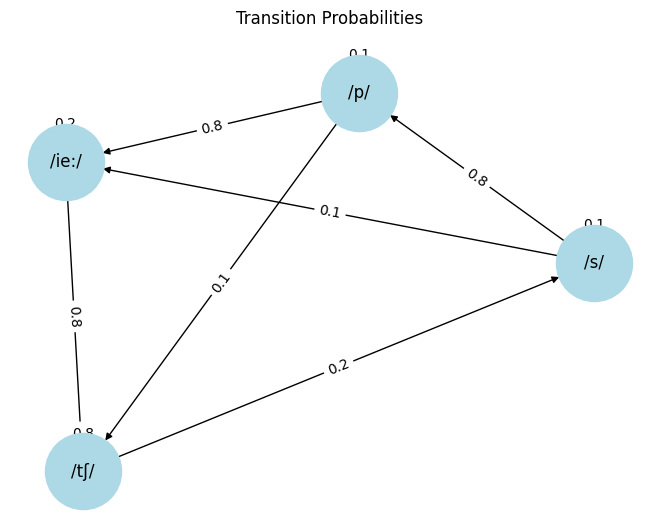

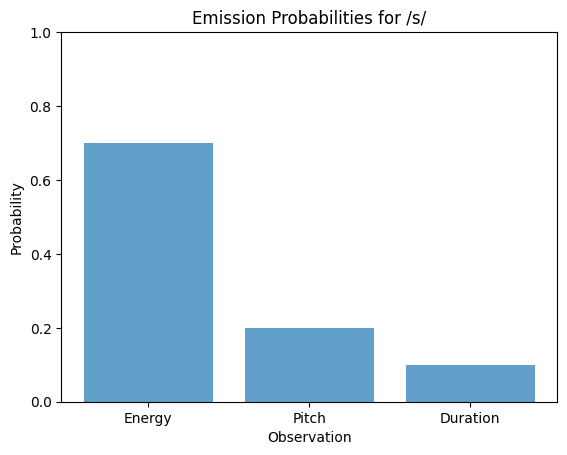

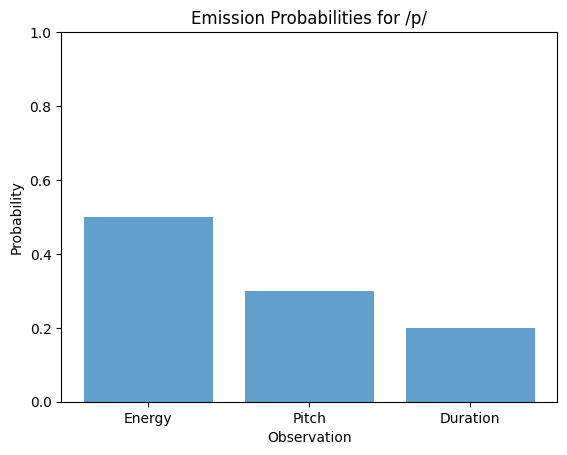

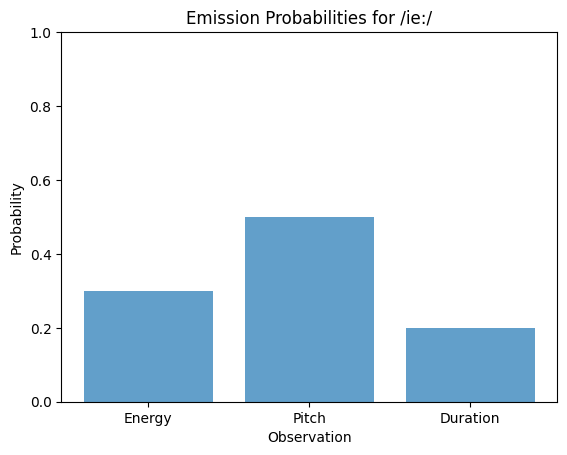

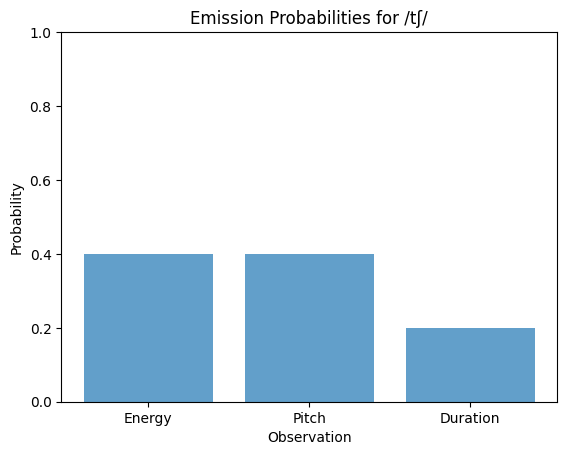

In [19]:
if __name__ == "__main__":
    display_matrices()

    phoneme_sequence, observation_sequence = generate_sequence()
    print("\nGenerated Phoneme Sequence:")
    print(phoneme_sequence)

    print("\nGenerated Observation Sequence:")
    print(observation_sequence)

    plot_probabilities()
